# Prosper Loan Data Exploration
## By Tayebwa Crispus

# Preliminary Wrangling
The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, during the year 2009-2014. There are two primary categories:

> Borrower information: Basic qualities of the borrowers such as annual income, condition of employment, interest rate, loan status, etc.
> Loan performance information: Metrics analyzing the risk connected with the loans such as Prosper score and bank card utilization, etc.

In [27]:
# import all packages
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
#set visualiztion behaviour
%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1700,0AF635954589309543DEF94,1068141,2013-12-04 10:16:16.790000000,NaN,36,Current,NaN,0.19501,0.1585,0.1485,...,-6.72,0.0,0.00,0.0,0.0,1.0,0,0,0.0,1
36608,7E333549556281233B92E28,599421,2012-06-13 11:17:09.080000000,NaN,36,Completed,2013-01-23 00:00:00,0.35797,0.3177,0.3077,...,-17.11,0.0,0.00,0.0,0.0,1.0,0,0,0.0,45
8028,8EDC3524276743796FEF8D0,524260,2011-08-29 10:08:08.610000000,NaN,36,Current,NaN,0.30532,0.2699,0.2599,...,-33.09,0.0,0.00,0.0,0.0,1.0,0,0,0.0,1
86572,438A3588953075140300320,884322,2013-08-30 19:45:51.453000000,NaN,36,Current,NaN,0.13697,0.1089,0.0989,...,-40.45,0.0,0.00,0.0,0.0,1.0,0,0,0.0,177
11335,5DB83600871174699C124B4,1114591,2014-01-16 11:16:58.077000000,NaN,60,Current,NaN,0.15844,0.1355,0.1255,...,-19.18,0.0,0.00,0.0,0.0,1.0,0,0,0.0,1
39477,7DE53421901762265443E8E,333949,2008-05-16 11:40:54.527000000,AA,36,Completed,2011-05-28 00:00:00,0.14709,0.1400,0.1200,...,-81.57,0.0,0.00,0.0,0.0,1.0,0,0,0.0,84
56359,DBB83458368271149C4B672,418674,2009-07-29 19:13:34.357000000,NaN,36,Completed,2010-01-06 00:00:00,0.10295,0.0680,0.0580,...,-3.71,0.0,0.00,0.0,0.0,1.0,0,0,0.0,58
15988,722B35906526644268B3911,933533,2013-09-27 14:26:39.530000000,NaN,36,Completed,2013-10-18 00:00:00,0.20268,0.1660,0.1560,...,-3.07,0.0,0.00,0.0,0.0,1.0,0,0,0.0,51
91837,71023397003949886252E01,190483,2007-08-21 09:41:50.377000000,AA,36,Defaulted,2009-04-07 00:00:00,0.13654,0.1295,0.1245,...,-123.48,0.0,16413.59,16413.6,0.0,1.0,0,0,0.0,565
78382,EB223555248201243204D6C,628028,2012-08-23 10:41:27.480000000,NaN,36,Current,NaN,0.24758,0.2099,0.1999,...,-81.72,0.0,0.00,0.0,0.0,1.0,0,0,0.0,40


## Data assessment

First, let's create a list containing the key features for our analysis:

In [12]:
target_columns =  ['ListingCreationDate', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner',
                'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR', 'Occupation']

In [13]:
df[target_columns].sample(20)

,ListingCreationDate,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,Occupation
103658,2013-11-01 05:24:49.363000000,1,MA,False,"$50,000-74,999",True,0.28,4666.666667,36,C,Employed,Current,6360,0.21290,Other
105960,2006-05-26 09:37:19.283000000,0,NY,False,Not displayed,True,0.06,20916.666667,36,NaN,NaN,Completed,10000,0.15602,NaN
11432,2012-10-04 14:54:56.093000000,6,NJ,False,"$50,000-74,999",True,0.10,5416.666667,36,D,Full-time,Completed,3500,0.28339,Other
85849,2010-03-17 15:50:34.943000000,1,SC,True,"$100,000+",True,0.24,9000.000000,36,D,Full-time,Chargedoff,6500,0.33616,Sales - Commission
50557,2011-09-22 11:15:01.103000000,7,SC,False,"$25,000-49,999",False,NaN,2833.333333,36,HR,Employed,Chargedoff,2000,0.34887,Attorney
102586,2013-06-23 07:46:02.347000000,1,MI,True,"$50,000-74,999",True,0.41,5416.666667,36,A,Employed,Current,15000,0.14348,Engineer - Mechanical
71783,2011-06-03 17:22:49.680000000,2,IN,True,"$25,000-49,999",True,0.37,2700.000000,36,E,Employed,Past Due (1-15 days),7500,0.35643,Other
19764,2010-08-04 12:14:24.087000000,1,CA,False,"$25,000-49,999",True,0.07,2750.000000,36,D,Employed,Completed,1500,0.31463,Professional
32905,2013-08-24 17:10:40.913000000,1,TX,False,"$25,000-49,999",True,0.34,2333.333333,36,D,Employed,Current,4000,0.27285,Medical Technician
58163,2008-06-01 20:27:29.580000000,4,NY,False,"$25,000-49,999",True,0.25,2666.666667,36,NaN,Full-time,Completed,1500,0.26038,Clerical


In [16]:
df[target_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   IsBorrowerHomeowner        113937 non-null  bool   
 4   IncomeRange                113937 non-null  object 
 5   IncomeVerifiable           113937 non-null  bool   
 6   DebtToIncomeRatio          105383 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   Term                       113937 non-null  int64  
 9   ProsperRating (Alpha)      84853 non-null   object 
 10  EmploymentStatus           111682 non-null  object 
 11  LoanStatus                 113937 non-null  object 
 12  LoanOriginalAmount         113937 non-null  int64  
 13  BorrowerAPR                11

To gain a sense of the overall distribution of datatypes, null values, and the nomenclature of the column names, we will check for duplication, then preview a brief summary of these features:

In [17]:
# Examine for duplicates
duplicates = df[target_columns].duplicated().sum()
print('There are {} duplicate records in the dataset'.format(duplicates))

There are 871 duplicate records in the dataset


## Data  cleaning

We will begin by making a duplicate of the original dataframe, and then take care of each problem with quick cleaning workflows:

In [18]:
clean_df = df.copy()

#### Extract the target columns from the dataframe

In [19]:
# Extract target columns from the original dataframe
clean_df = clean_df[target_columns]

# Verify the changes
assert len(clean_df.columns) == len(target_columns)

#### Drop the duplicate records from the dataframe

In [20]:
clean_df = clean_df.drop_duplicates()

# Verify results
assert not clean_df.duplicated().any()

#### Reassign ListingCategory (numeric) and ProsperRating (Alpha) with proper column names

In [16]:
# Rename the columns
clean_df = clean_df.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

# verify code results
for col_name in ['ListingCategory', 'ProsperRating']:
    assert col_name in clean_df.columns

#### Convert ListingCreationDate to DateTime object

In [17]:
# Rename the columns
clean_df = clean_df.rename(columns = {'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

# verify code results
for col_name in ['ListingCategory', 'ProsperRating']:
    assert col_name in clean_df.columns

#### Convert ListingCreationDate to DateTime object

In [18]:
clean_df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

# Verify results
clean_df.dtypes[0:2]

ListingCreationDate    datetime64[ns]
ListingCategory                 int64
dtype: object

#### Map the ListingCategory column to the right category titles¶

In [19]:
# First, let us store all the numeric categories and their titles in a dictionary
category_titles = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
                   4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby & Adoption', 
                   9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
                  13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical or Dental', 16 : 'Motorcycle',
                  17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Secondly, let us map the dictionary contents to the ListingCategory column
clean_df.ListingCategory = clean_df.ListingCategory.map(category_titles)

# Preview results
clean_df.ListingCategory.unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical or Dental', 'Wedding Loans', 'Vacation', 'Business',
       'Taxes', 'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

#### Replace 'Not employed' entries in IncomeRange with $0

In [20]:
clean_df.IncomeRange = clean_df.IncomeRange.str.replace('Not employed', '$0')

# Verify changes
assert 'Not employed' not in clean_df.IncomeRange

#### Solving the issue of  null values in BorrowerAPR, ProsperRating, and DebtToIncomeRatio columns

*ProsperRating* and *BorrowerAPR* are essential components of our analysis. These variables are our dependent ones. Therefore, it is crucial to keep their data's integrity. If the total number of null values is fewer than 30% of the entries in our entire dataframe, we will discard them. This makes sure that even after removing the null values, we still have plenty of data to evaluate.

Values in the DebtToIncomeRatio column can be null if:

> * The borrower has never taken a debt on the platform before.
> * The borrower is currently not servicing any debt.

As a result, the BorrowerAPR and ProsperRating columns will only have null values that we will deal with.

In [21]:
# Create a list of columns with null values
null_columns = ['BorrowerAPR', 'ProsperRating']

# Estimate the number of null records in each column using a list comprehension
null_counts = [clean_df[col].isnull().sum() for col in null_columns]

# Calculate the total percentage of null values in the dataframe
null_proportion = sum(null_counts) / df.shape[0]

print('The total percentage of null records is ' + str(null_proportion * 100)[:4] + '%')

The total percentage of null records is 25.5%


We will proceed to remove the null records from our dataframe because the total proportion is below 30%:

In [22]:
# Eliminate null values from the dataframe
for col in null_columns:
    clean_df = clean_df[clean_df[col].notnull()]

# Verify results
for col in null_columns:
    assert clean_df[col].notnull().any()

#### Convert ProsperRating and IncomeRange columns to ordered categorical types

In [23]:
# let us store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    clean_df[key] = clean_df[key].astype(correct_order)

# Verify changes
clean_df[order_dict.keys()].dtypes

ProsperRating    category
IncomeRange      category
dtype: object

### Wrangling additional data

Depending on where the borrower is located, the information in the **BorrowerState** column is an abbreviation of the several US states. We will need to obtain data from external sources, particularly one that has the full name, latitude, and longitude for each state, in order to conveniently see and study this type of information.

A GitHub user named [Rashida048](https://github.com/rashida048), uploaded this additonal information online. Let us download the [csv file](https://raw.githubusercontent.com/rashida048/Exploratory-data-Analysis-in-R/main/statelatlong.csv) programatically, using the requests library:

In [24]:
# let us rogrammatically download the csv file
url = 'https://raw.githubusercontent.com/rashida048/Exploratory-data-Analysis-in-R/main/statelatlong.csv'
response = requests.get(url)
with open('state_data.csv', 'wb') as file:
    file.write(response.content)

In [8]:
# Reading the downloaded state data
state_df = pd.read_csv('state_data.csv')
state_df.head(3)

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona


Now, let us merge the state data with the clean data:

In [21]:
# Merge clean_df and state_df
loan_df = pd.merge(clean_df, state_df, left_on='BorrowerState', right_on='State')
loan_df.head(5)

,ListingCreationDate,ListingCategory (numeric),BorrowerState,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,DebtToIncomeRatio,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus,LoanStatus,LoanOriginalAmount,BorrowerAPR,Occupation,State,Latitude,Longitude,City
0,2007-08-26 19:09:29.263000000,0,CO,True,"$25,000-49,999",True,0.17,3083.333333,36,NaN,Self-employed,Completed,9425,0.16516,Other,CO,38.997934,-105.550567,Colorado
1,2014-02-27 08:28:07.900000000,2,CO,False,"$50,000-74,999",True,0.18,6125.000000,36,A,Employed,Current,10000,0.12016,Professional,CO,38.997934,-105.550567,Colorado
2,2010-06-16 16:23:44.533000000,1,CO,True,"$75,000-99,999",True,0.26,6666.666667,36,A,Full-time,Completed,4000,0.11296,Executive,CO,38.997934,-105.550567,Colorado
3,2013-05-01 08:18:59.183000000,1,CO,True,"$50,000-74,999",True,0.35,5416.666667,36,A,Employed,Current,15000,0.15833,Professional,CO,38.997934,-105.550567,Colorado
4,2011-11-13 20:05:58.260000000,7,CO,True,"$75,000-99,999",True,0.23,6250.000000,36,HR,Employed,Completed,4000,0.35643,Construction,CO,38.997934,-105.550567,Colorado


Now, let us rename the **BorrowState** coulmn to something like **BorrowerStateCode** and then rename the **City** column to **BorrowerState** and then drop the **State** column becasue it is not necessary:

In [27]:
# Rename columns 
loan_df= loan_df.rename(columns={'BorrowerState': 'BorrowerStateCode', 'City': 'BorrowerState'})
# Drop the 'State' column
loan_df.drop(columns = ['State'], inplace=True)

In [28]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83982 entries, 0 to 83981
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ListingCreationDate  83982 non-null  datetime64[ns]
 1   ListingCategory      83982 non-null  object        
 2   BorrowerStateCode    83982 non-null  object        
 3   IsBorrowerHomeowner  83982 non-null  bool          
 4   IncomeRange          83982 non-null  category      
 5   IncomeVerifiable     83982 non-null  bool          
 6   DebtToIncomeRatio    76768 non-null  float64       
 7   StatedMonthlyIncome  83982 non-null  float64       
 8   Term                 83982 non-null  int64         
 9   ProsperRating        83982 non-null  category      
 10  EmploymentStatus     83982 non-null  object        
 11  LoanStatus           83982 non-null  object        
 12  LoanOriginalAmount   83982 non-null  int64         
 13  BorrowerAPR          83982 non-

The final dataframe consists of **83,982** rows and **17** columns. This should be enough for exploratory analysis.

## Exploratory Data Analysis

We'll develop univariate, bivariate, and multivariate visualizations to methodically investigate our data. Throughout the investigation, the Question-Visualization-Observations framework will be used.

It is advisable to compute the descriptive statistics of the relevant numeric columns in order to develop an understanding of how the numeric values are distributed. When configuring histogram bins for univariate studies, this will be quite beneficial.

In [29]:
# Computing descriptive statistics for all the numeric columns
loan_df.describe()

,DebtToIncomeRatio,StatedMonthlyIncome,Term,LoanOriginalAmount,BorrowerAPR,Latitude,Longitude
count,76768.000000,8.398200e+04,83982.000000,83982.000000,83982.000000,83982.000000,83982.000000
mean,0.258692,5.930614e+03,42.462813,9061.224381,0.226945,37.657466,-91.232628
std,0.319727,8.268432e+03,11.639032,6279.649648,0.080047,4.721124,16.090169
min,0.000000,0.000000e+00,12.000000,1000.000000,0.045830,20.460000,-158.775020
25%,0.150000,3.426938e+03,36.000000,4000.000000,0.163610,35.214563,-100.076842
50%,0.220000,5.000000e+03,36.000000,7500.000000,0.219450,38.498779,-86.415805
75%,0.320000,7.083333e+03,60.000000,13500.000000,0.292540,40.705626,-79.458786
max,10.010000,1.750003e+06,60.000000,35000.000000,0.423950,61.302501,-71.506451


## 1. Univariate exploration

One of our primary elements of interest is the BorrowerAPR (Annual Percentage Rate). Let's begin by examining the distribution of the characteristic throughout the loan dataset:

**Do the majority of loans have high or low borrower APR values according to the dataset's distribution of borrower APR values?**

**Visualization**

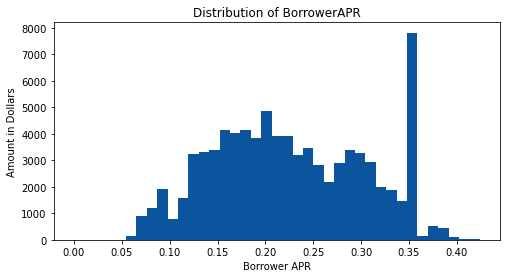

In [75]:
# Setting color for all univariate plots
colors = sns.color_palette('Blues')

bins = np.linspace(0, loan_df.BorrowerAPR.max(), 40)

plt.figure(figsize=(8, 4))
plt.hist(data=loan_df, x='BorrowerAPR', bins=bins, color = colors[5]);
plt.title("Distribution of BorrowerAPR")
plt.xticks(np.arange(0, 0.45, 0.05))
plt.xlabel('Borrower APR')
plt.ylabel("Amount in Dollars");

**Observations**

* With peaks at 0.09, 0.2, and 0.3, the borrower APR seems to follow a multimodal distribution. There is also a fairly steep peak between 0.35 and 0.36. Few postings, on average, have borrower APRs higher than 0.4.

**Are borrowers taking on more debt than their income can support? How are the values for the debt-to-income ratio distributed?**

**Visualization**

<Figure size 576x576 with 0 Axes>

Text(0, 0.5, 'Amount in Dollars')

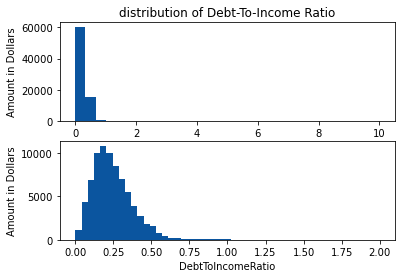

In [79]:
plt.figure(figsize=(8, 8))
fig.tight_layout(pad=5.0)
 
plt.show()

plt.subplot(2,1,1)
plt.title('distribution of Debt-To-Income Ratio')
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=30, color = colors[5]);
plt.xlabel('DebtToIncomeRatio')
plt.ylabel("Amount in Dollars");

# Expand the distribution in order to examine clearly, with evenly spaced bins
bins = np.linspace(0, 2, 50)
plt.subplot(2,1,2)
plt.hist(data=loan_df, x='DebtToIncomeRatio', bins=bins, color = colors[5])
plt.xlabel('DebtToIncomeRatio')
plt.ylabel("Amount in Dollars")

**Observations**

* Right-skewed distribution can be seen in the debt-to-income ratio. Most borrowers appear to favor taking out loans that are affordable. This is understandable because the majority of values are spread out between 0 and 1.
* When we enlarge this distribution, we can make out a peak between 0.20 and 0.25. This may indicate that borrowers prefer to keep their debt levels between 25% and 50% of their income. Living within their means seems to be accomplished in this way.



It would be interesting to understand how the real monthly incomes of borrowers are divided as well, because we have just recently gleaned a few insights from the distribution of debt-to-income ratios. We need to investigate the **StatedMonthlyIncome** feature to get this information:

**How are borrowers' monthly incomes split among them on the platform?**

**Visualization**

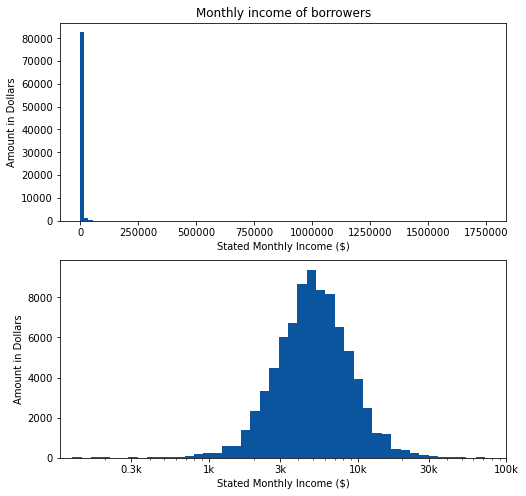

In [80]:
plt.figure(figsize=(8, 8))

# Plotting a scaled plot
plt.subplot(2, 1, 1)
plt.title('Monthly income of borrowers')
plt.ticklabel_format(style='plain')
plt.hist(data=loan_df, x='StatedMonthlyIncome', bins=100, color = colors[5])
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel("Amount in Dollars");

# Account for the severe right skew by making another plot
plt.subplot(2, 1, 2)
# convert the highest income value to log scale
bins_max = np.log10(loan_df.StatedMonthlyIncome.max())

# curate 100 evenly transformed bins to hold data groups
bins_trans = 10 ** np.linspace(0, bins_max, 100)
plt.hist(data=loan_df, x='StatedMonthlyIncome', bins=bins_trans, color = colors[5])

# Convert the  x axis to a logarithmic scale
plt.xscale('log')

# Draw tick marks on the x-axis from 300 to 100,000 USD, equally spaced.
plt.xticks([3e2, 1e3, 3e3, 1e4, 3e4, 1e5], 
           ['0.3k', '1k', '3k', '10k', '30k', '100k']);

plt.xlim(1e2, 1e5)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel("Amount in Dollars");

**Observations**

* Due to the inclusion of high earners in the mix, the distribution of stated monthly income is significantly right skewed. The first graphic demonstrates that the majority of borrower incomes are less than $250,000.
* We find that many borrowers earn between $1,000 and 30,000 US dollars per month, with a peak around 5,000 US dollars, after adjusting for the large variation in income on a log scale and zooming into the 0 and 100,000 range.

**What is the distribution of the loan amounts that the borrowers have requested?**

**Visualization**

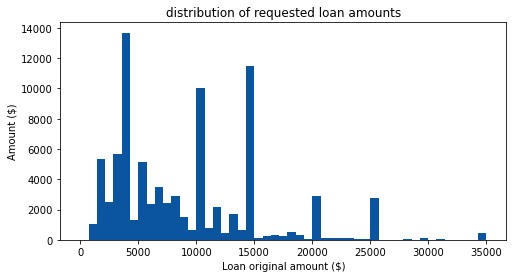

In [70]:
plt.figure(figsize=(8, 4))
bins = np.linspace(0, loan_df.LoanOriginalAmount.max(), 50)
plt.hist(data=loan_df, x='LoanOriginalAmount', bins=bins, color = colors[5])
plt.title('distribution of requested loan amounts')
plt.xlabel('Loan original amount ($)')
plt.ylabel('Amount ($)');

**Observations**

* Interesting spikes in the loan amounts can be seen around multiples of 5,000. This may imply that most borrowers request loans in multiples of 5,000 to make the request process more convenient. It is also evident that the majority of loans are under $15,000 USD.

**How are loan lengths spread across the dataset? Which loan conditions are most frequently asked for by borrowers?**

**Visualization**

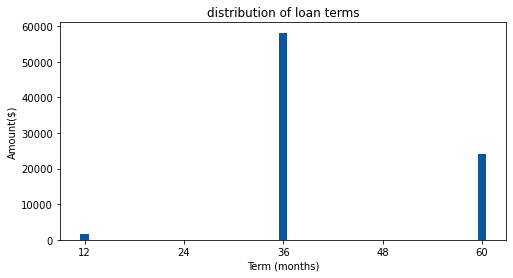

In [71]:
#Term is considered a discrete quantitative variable
#Set up bins with the term values in the center. After that, deduct 0.5 to get rid of the additional bin in the end.
bins = np.arange(loan_df.Term.min(), loan_df.Term.max()+1.5) - 0.5

# lets plot histogram with centred bins
plt.figure(figsize=(8, 4))
plt.title('distribution of loan terms')
plt.hist(data = loan_df, x='Term', bins=bins, color = colors[5])
# draw ticks spaced at 12 month intervals
plt.xticks(np.arange(12, 61, 12))
plt.xlabel('Term (months)')
plt.ylabel('Amount($)');

**Observations**

* The dataset appears to only contain three distinct loan terms: 12 months, 36 months, and 60 months. These translate into loans with terms of a year, two years, and five years, respectively. This may imply that the prosper platform only offers lenders three loan repayment options, perhaps based on the loan's size. On [this page](https://www.prosper.com/loans/loan-types/?ref=driverlayer.com) of the prosper website, a quick search also turns up relevant results.

**How are the dataset's postings spread in terms of Prosper ratings, income range, and employment status?**

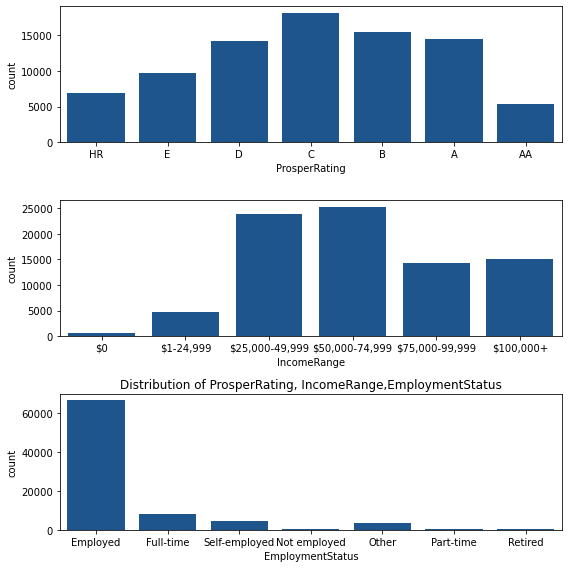

In [60]:
columns = ['ProsperRating', 'IncomeRange', 'EmploymentStatus']

fig, ax = plt.subplots(nrows=3, figsize=(8, 8))

for col, index in zip(columns, range(3)):
    sns.countplot(data=loan_df, x=loan_df[col],color = colors[5], ax= ax[index])
    plt.title("Distribution of ProsperRating, IncomeRange,EmploymentStatus")
    
plt.tight_layout();

**Observations**

* The prosper rating distribution is unimodal, with the centre grade represented by the most prevalent rating (C). The least frequent listings are those with extremely high positive ratings (AA).
* Range of income exhibits a left skew. Most of the advertisements are for borrowers with annual incomes of between 25,000 and 74,999 US dollars. Only a small percentage of the listings had borrowers with annual incomes under 25,000 US dollars.
* The job status pattern demonstrates that the bulk of postings are made by people who are employed. Given how challenging it would be to get a loan without a job, this makes sense.

**How are the variables IncomeVerifiable, ListingCategory, and IsBorrowerHomeowner distributed?**

**Visualization**

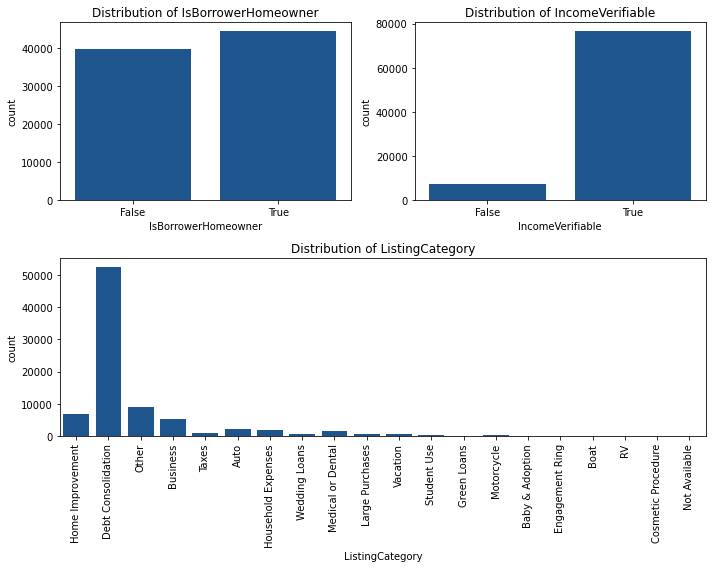

In [66]:
fig = plt.figure(figsize=(10, 8))
# IsBorrowerHomeowner
plt.subplot(2,2,1)
sns.countplot(data=loan_df, x='IsBorrowerHomeowner', color = colors[5])
plt.title('Distribution of IsBorrowerHomeowner')

# IncomeVerifiable
plt.subplot(2,2,2)
sns.countplot(data=loan_df, x='IncomeVerifiable', color = colors[5])
plt.title('Distribution of IncomeVerifiable')

# ListingCategory
# Fill the two subplots in the second row with the last two axes.
plt.subplot(2,1,2)
sns.countplot(data=loan_df, x='ListingCategory', color = colors[5])
plt.title('Distribution of ListingCategory')
plt.xticks(rotation=90)
plt.tight_layout();

**Observations**

* On the platform, homeowners are more frequently discovered applying for loans than non-homeowners.
* The vast majority of platform users are verifiable income earners. To expect this: Without a source of income that can be verified, applying for a loan might not produce the expected outcomes.
* Surprisingly, it seems that some people use the platform to borrow money to pay off other loans. These people make up a much larger percentage of the population than those who apply for loans for the commonly anticipated motives of business, home remodeling, car-related expenses, and medical expenses.

**How do dataset's entries differ in terms of loan status. Can we determine whether borrowers are making loan payments?**

**Visualization**

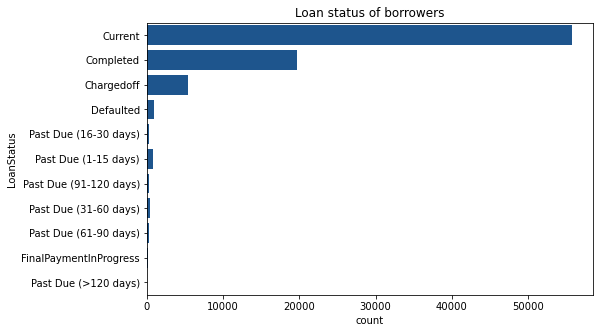

In [37]:
plt.figure(figsize=(8, 5))
plt.title('Loan status of borrowers')
sns.countplot(data=loan_df, y='LoanStatus', color=colors[5]);

**Observations**

* A large portion of the collection is made up of active loans (over 50,000 records). Completed loans make up a sizable chunk of the listings as well (about 20,000 records). Despite the small number of defaulting loans, there are around 5,000 records of charged-off loans, suggesting losses for investors.
* It will be difficult to determine at this time if borrowers have been making their loan payments because the majority of the listings are current loans.

**Which states have the most listings that borrowers have created?**

**Visualization**

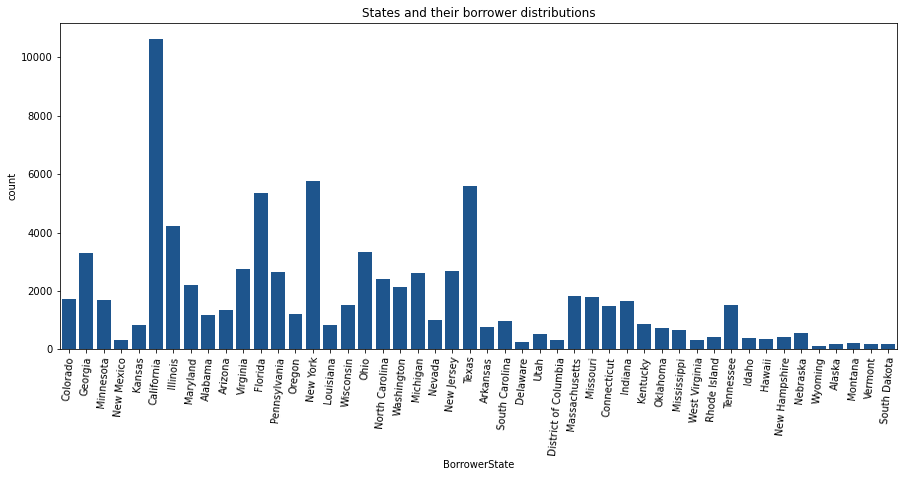

In [38]:
plt.figure(figsize=(15, 6))
plt.title('States and their borrower distributions')
sns.countplot(data=loan_df, x='BorrowerState', color = colors[5])
plt.xticks(rotation= 85);

**Observation**

* With almost 10,000 loan postings coming from Californian borrowers, the state has the most listed borrowers overall. Additionally, over 4000 ads each have been supplied by borrowers from New York, Texas, Florida, and Illinois. It's also noteworthy that Prosper is a California-based business. This may help to explain why the majority of borrowers came from there.

## 2. Bivariate Exploration

Now, the goal is to uncover intriguing connections that demonstrate how one variable affects another, ideally those that relate to our target variables, the borrower APR and Prosper rating.

During our univariate study, descriptive statistics was employed to acquire a sense of how numerical values are distributed. Investigating pairwise correlations between our numerical variables will be our first step. This will provide us a clearer understanding about how to carry out the remaining steps of our analysis.

**Are there any notable correlations or linkages between any of our numerical variables (DebtToIncomeRatio, StatedMonthlyIncome, LoanOriginalAmount, BorrowerAPR, and Term)?**

**Visualizations**

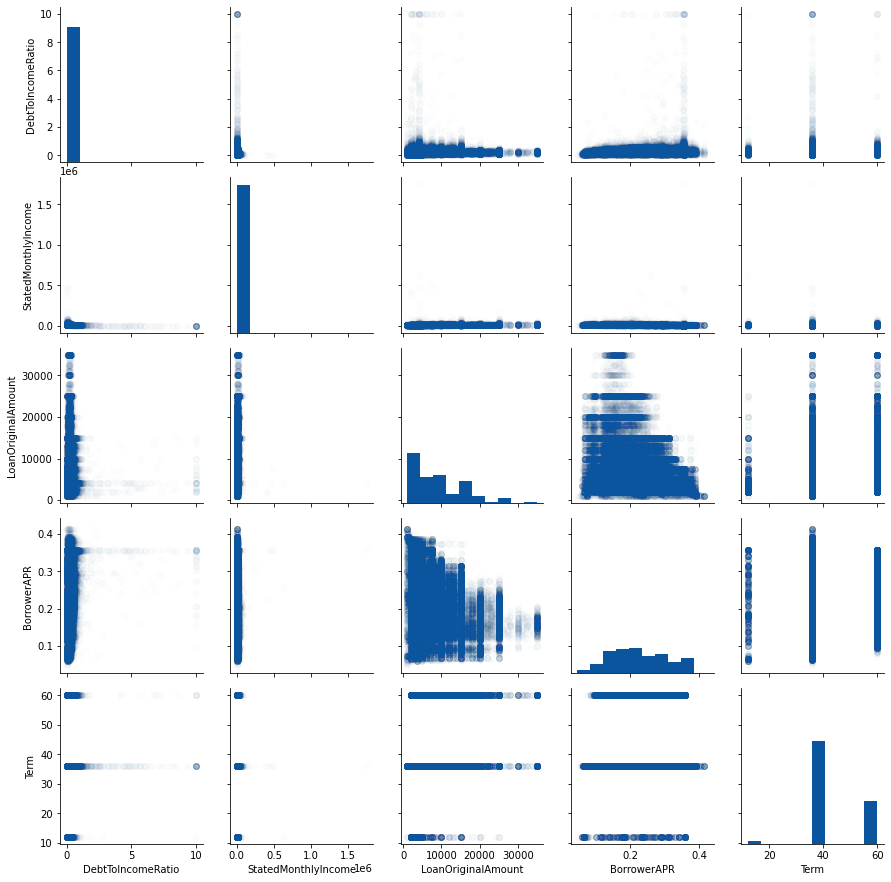

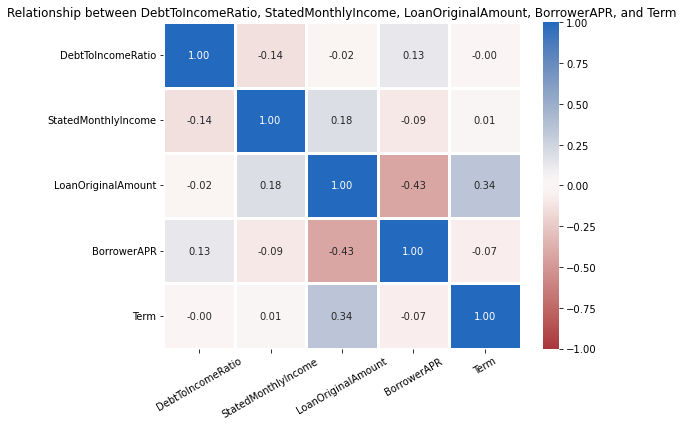

In [39]:
# lets store the numeric column names in a list
num_cols = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR', 'Term']

# Make a scatterplot that contrasts each numerical variable with each other.
fig = sns.PairGrid(loan_df[num_cols])
fig.map_diag(plt.hist, color = colors[5])
fig.map_offdiag(plt.scatter,color = colors[5], alpha=0.01);

# Use a heatmap to see how the numerical variables are correlated
plt.figure(figsize= (8, 6))
plt.title('Relationship between DebtToIncomeRatio, StatedMonthlyIncome, LoanOriginalAmount, BorrowerAPR, and Term')
sns.heatmap(data=loan_df[num_cols].corr(), annot=True, fmt='.2f', 
            cmap='vlag_r', vmin=-1, vmax=1, linewidth=3)
plt.xticks(rotation=30);

**Observation**

* The original loan amount and borrower annual percentage rate (APR) appear to have a moderately negative connection (-0.43). This suggests that loans with higher amounts may have lower annual percentage rates than loans with lower amounts.
* There is also a weakly positive association (0.34), between the loan length and the loan original amount. Given that borrowers could require longer terms to properly recoup larger loan amounts, this makes some sense.
* Currently, there are no significant connections between the other numerical variables.

**How does BorrowerAPR, StatedMonthlyIncome and LoanOriginalAmount correlate with the categorical variables?**

<Figure size 1440x1440 with 0 Axes>

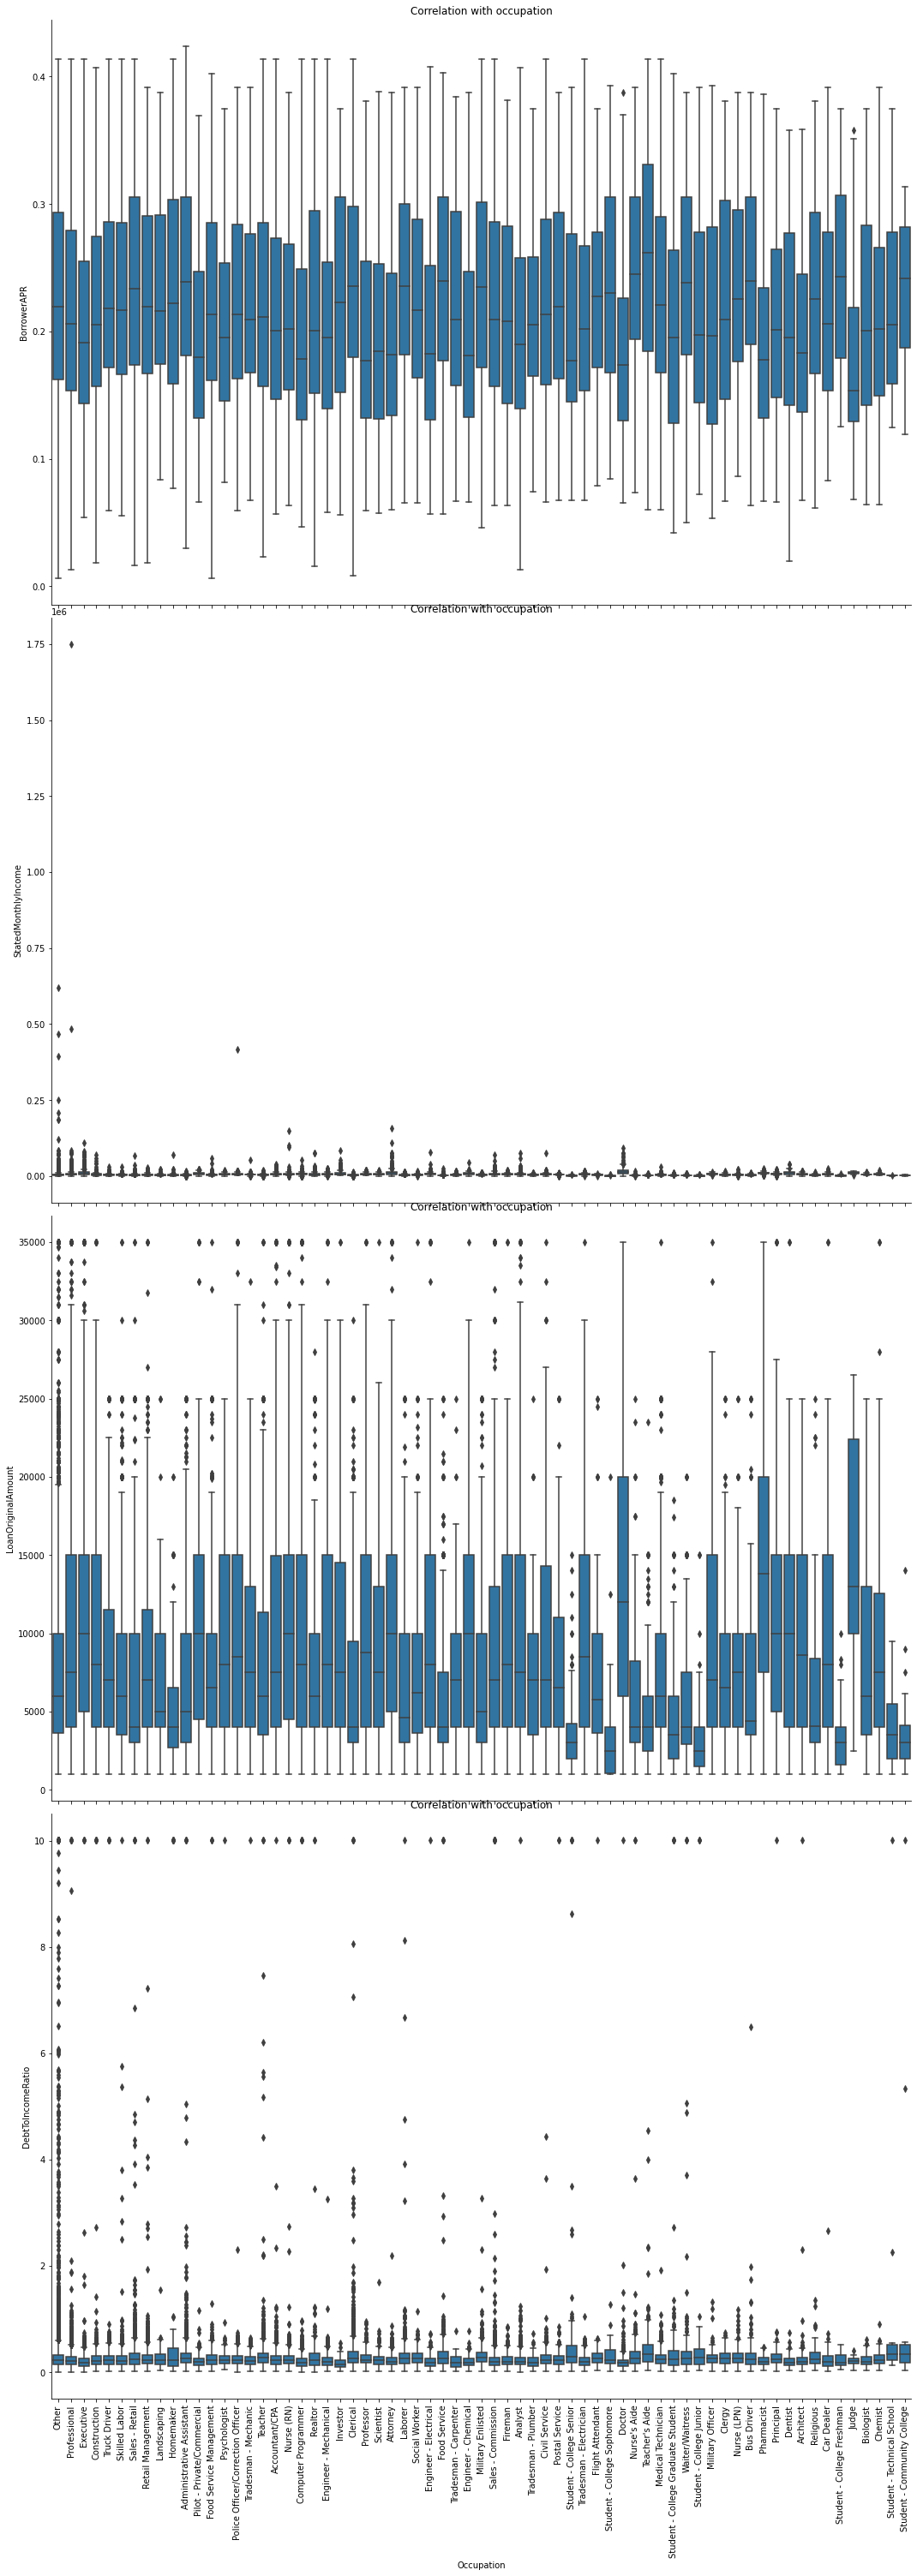

In [30]:
def boxgrid(x, y, **kwargs):
    #function for creating box plots with seaborn's PairGrid.
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)
    plt.title('Correlation with occupation')


plt.figure(figsize = [20, 20])
b = sns.PairGrid(data = loan_df, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount','DebtToIncomeRatio'], 
                x_vars = ['Occupation'] , height = 10, aspect = 1.5)
b.map(boxgrid);
plt.xticks(rotation=90);

**What's the connection between LoanOriginalAmount and ListingCategory? What causes, on average, do people seek the biggest loans?**

**Visualization**

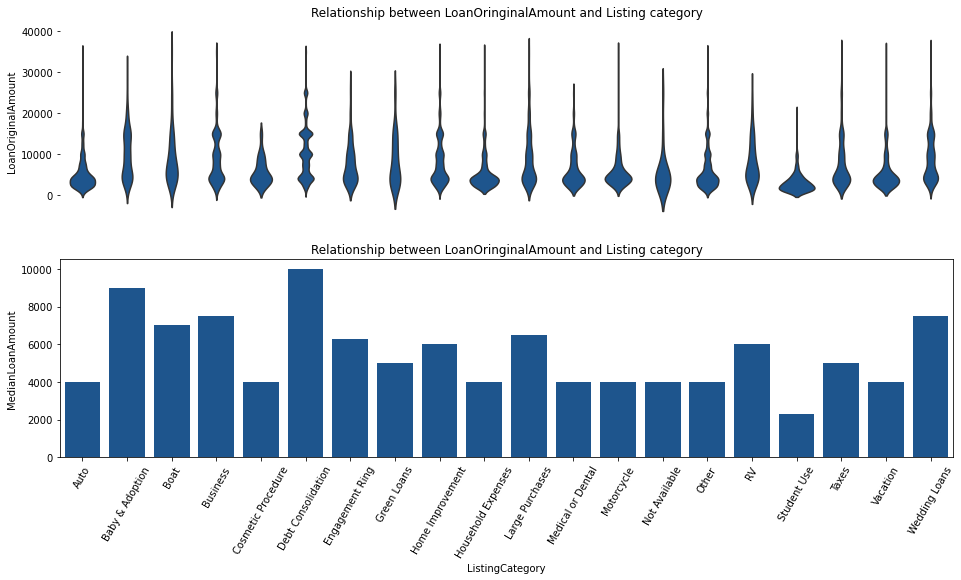

In [40]:
# Determine the median loan amount for each listing type.
table = loan_df.groupby('ListingCategory')['LoanOriginalAmount'].median()
table = table.reset_index(name='MedianLoanAmount')

# Develop a visual violinplot
plt.figure(figsize=(16, 8))
plt.subplot(2,1,1)
plt.title('Relationship between LoanOringinalAmount and Listing category')
sns.violinplot(data=loan_df.sort_values(by='ListingCategory'), x='ListingCategory', y='LoanOriginalAmount', inner=None,
               color=colors[5])

# let us eliminate the violinplot labels, ticks and spines
plt.xticks([])
plt.xlabel('')
sns.despine(left=True, bottom=True)

# now lets create a barplot
plt.subplot(2,1,2)
plt.title('Relationship between LoanOringinalAmount and Listing category')
sns.barplot(data=table, x='ListingCategory', y='MedianLoanAmount', ci=None, color=colors[5])
plt.xticks(rotation= 60);

**Observations**

* The most popular loan requests, on average, are for debt reduction, baby and adoption, businesses, weddings, and the purchase of luxuries like boats. On average, student loans are the smallest loans requested. People appear to be taking out enormous loans for extravagant and possibly incorrect reasons, which is an interesting pattern in this case.

**What is the connection between the loan original amount and the borrower state. What states do people seem to be borrowing the most money from on average?**

**Visualization**

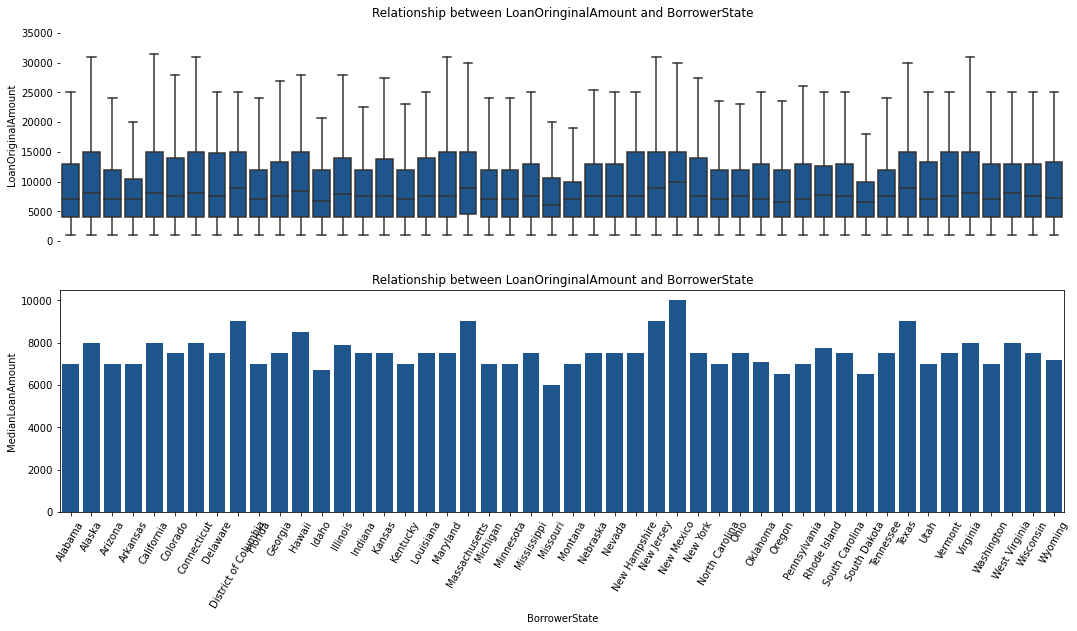

In [41]:
# Determine the median loan amount for each listing type.
table = loan_df.groupby('BorrowerState')['LoanOriginalAmount'].median()
table = table.reset_index(name='MedianLoanAmount')

# develop a boxplot visual
plt.figure(figsize=(18, 9))
plt.subplot(2,1,1)
plt.title('Relationship between LoanOringinalAmount and BorrowerState')
sns.boxplot(data=loan_df.sort_values(by='BorrowerState'), x='BorrowerState', y='LoanOriginalAmount', 
            fliersize=0, color=colors[5])

# let us eliminate the violinplot labels, ticks and spines
plt.xticks([])
plt.xlabel('')
sns.despine(left=True, bottom=True)

# now lets create a barplot
plt.subplot(2,1,2)
plt.title('Relationship between LoanOringinalAmount and BorrowerState')

sns.barplot(data=table, x='BorrowerState', y='MedianLoanAmount', ci=None, color=colors[5])
plt.xticks(rotation= 60);

**Observations**

* When compared to the other US states, New Mexico, New Jersey, Texas, the District of Columbia, Massachusetts, and Hawaii appear to be the states with the highest loan amounts listed.
* Despite being able to recognize these states, it might be challenging to get all the information you need at a glance. We will return to this during multivariate analysis, where we may generate a map that makes sense of this pattern by using data from the longitude and latitude columns.

**Does IncomeRange have the same relationship with ProsperRating as StatedMonthlyIncome?
Does owning a home correlate with better Prosper ratings?
Is a connection between EmploymentStatus and ProsperRating discernible?**

**Visualization**

> A clustered bar graph can be used to illustrate the connection between two classified variables. For one of the variables to appear as a quantitative value along the y-axis of our plot, we might need to apply further processing. Calculating the second variable's frequency is one strategy. Instead, in our situation, we shall calculate the proportion (percentage) of the second variable. As a result, we can compare all of our variables on a uniform scale of 100%. The advantage of being able to compare the relative frequency of the y-axis variable within the x-axis outweighs any potential loss of information regarding the absolute frequency of each variable on the x-axis.

> We will define two functions to carry out these operations. The first function, compute proportions(), determines how much of the y-axis variable is contained within the x-axis variable, and the second function, plot proportions(), plots a column bar chart using the determined proportions.

In [91]:
# let us filter out entries where employment status is 'other'
employment_filter = loan_df.query('EmploymentStatus != "Other"')

In [97]:
def compute_proportions(df, group_column, proportion_column):
    
    # Group dataframe by group_column and proportion_column
    result = df.groupby([group_column, proportion_column]).agg({proportion_column: 'size'})
    
    # Compute the proportions of proportion_column within group_column
    result = result.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    
    # let us proportion results and reset dataframe index
    result.rename(columns={proportion_column: 'percent_of_total'}, inplace=True)
    result = result.reset_index()
    return result

def plot_proportions(df, group_column, proportion_column, rocket):
    # lets call all the compute proportion function
    table = compute_proportions(df, group_column, proportion_column)
    # Create Column bar chart
    sns.barplot(data=table, x= group_column, y= 'percent_of_total', hue=proportion_column, palette='rocket')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", title=proportion_column)

After defining our functions, we can create visualizations to provide the answers to our queries.

In [98]:
# let us filter out entries where employment status is 'other'
employment_filter = loan_df.query('EmploymentStatus != "Other"')

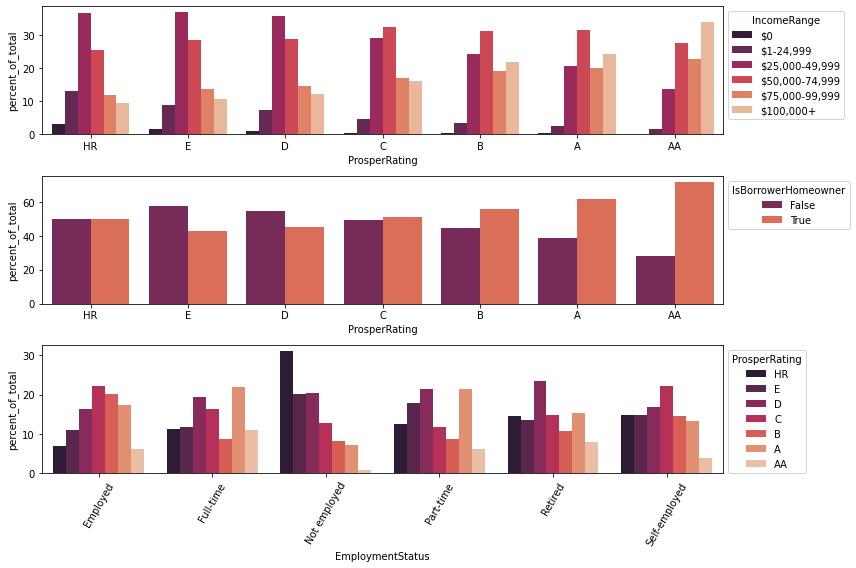

In [100]:
plt.figure(figsize=(12,8))

# ProsperRating vs IncomeRange
plt.subplot(3,1,1)
plot_proportions(loan_df, 'ProsperRating', 'IncomeRange', 'PuBu')

# Prosper Rating vs IsBorrowerHomeowner
plt.subplot(3,1,2)
plot_proportions(loan_df, 'ProsperRating', 'IsBorrowerHomeowner', 'Paired')

# EmploymentStatus vs ProsperRating
plt.subplot(3,1,3)
plot_proportions(employment_filter, 'EmploymentStatus', 'ProsperRating', 'Blues')

plt.xticks(rotation=60)
plt.tight_layout();

**Observation**

* The percentage of high income earners rises as thrive rating does. At the higher end of the economic rating scale and vice versa, high incomes are more concentrated. This confirms what we already knew about ProsperRating and StatedMonthlyIncome.
* Additionally, home ownership is favorably correlated with Prosper scores. The percentage of homeowners are higher in the highest prosper ratings (AA, A, and B), whereas they are lower in the lower prosper ratings. This makes logical given that real estate, such as a home, can be used as security for loans. Additionally, it encourages lenders to see loan requests from borrowers as less hazardous, leading to the better positive rating.
* Borrowers without jobs typically have the Prosper rating with the lowest score, HR.

**What is the relationship between LoanOriginalAmount and BorrowerAPR?**

**Visualization**

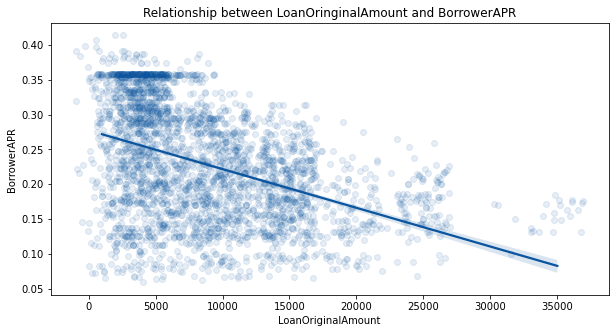

In [42]:
#Consider a sample of 3000 records from the loan_df dataframe
plt.figure(figsize=(10, 5))
plt.title('Relationship between LoanOringinalAmount and BorrowerAPR')
sns.regplot(data=loan_df.sample(3000, random_state=1), x='LoanOriginalAmount', y='BorrowerAPR', 
            x_jitter=2000, color = colors[5], scatter_kws={'alpha': 0.1});

**Observations**

* Additionally supporting the inverse association between LoanOriginalAmount and BorrowerAPR is the clear visualization and regression line. In comparison to smaller loans, larger loans are more likely to have lower interest rates.
* Smaller loan amounts frequently have marginally higher interest rates to compensate the fixed costs lenders pay to secure and handle the loan during repayment, according to a supporting article by Zillow home loans. Conversely, because they are slightly more profitable than smaller loans, loans at the higher end of the conforming loan range can have a slightly lower interest rate.

## 3. Multivariate Exploration

Let's first investigate the connection between loan amount collected, borrower APR, and home ownership status.

**How do LoanOriginalAmount, ProsperRating, and IsBorrowerHomeowner relate to one another? Do homeowners generally receive larger loans than non-homeowners?**

**Visualization**

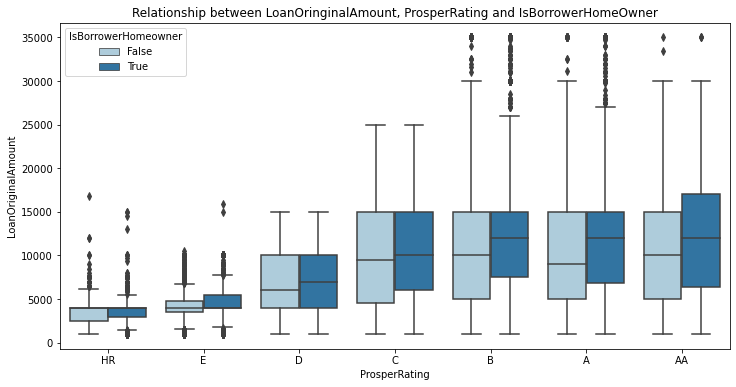

In [43]:
plt.figure(figsize=(12, 6))
plt.title('Relationship between LoanOringinalAmount, ProsperRating and IsBorrowerHomeOwner')
sns.boxplot(data=loan_df, x='ProsperRating', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Paired');

**Observations**

* In fact, homeowners receive larger loan amounts on average than non-homeowners across all prosper ratings. When greater loan amounts are involved, possessing a home is a good consideration in addition to other reasons.

**What kind of interaction exists when the BorrowerAPR, LoanOriginalAmount, and ProsperRating are combined?**

**Visualization**

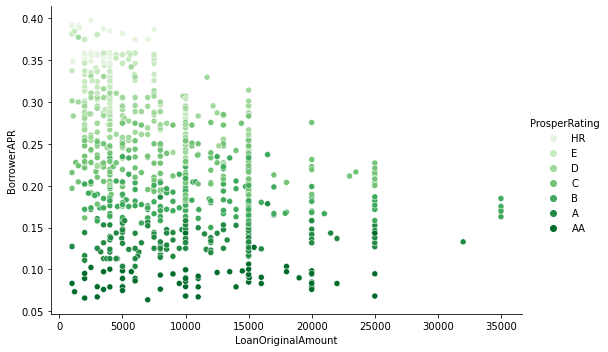

In [44]:
#consider a sample size of 1000
sns.relplot(data=loan_df.sample(1000, random_state=1), y='BorrowerAPR', x='LoanOriginalAmount', 
            hue='ProsperRating', palette='Greens', height=5, aspect=1.5);

**Observations**

* Here, it is easy to see how the three variables are related to one another. While borrowers with better prosper ratings benefit from larger loan amounts at lower rates, individuals with lower prosper ratings must take out smaller loans at higher percentage rates.

**What kind of interaction exists when the BorrowerAPR, LoanOriginalAmount, and IncomeRange are combined?**

**Visualization**

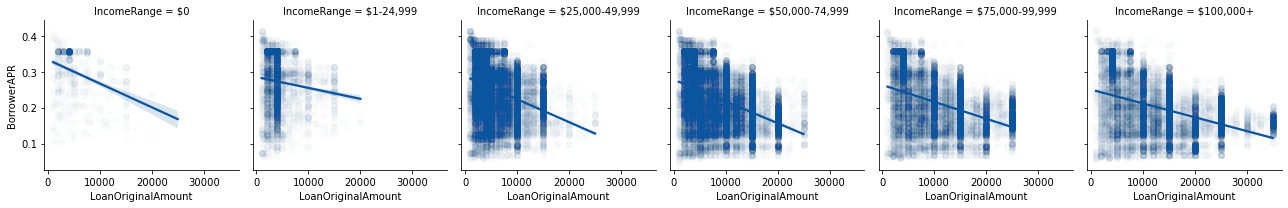

In [45]:
fig = sns.FacetGrid(data=loan_df, col='IncomeRange')
fig.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', color=colors[5], scatter_kws={'alpha': 0.01});

**Observations**

* This association resembles the one we saw with prosper ratings earlier. Larger loans are available at lower APRs for high income borrowers than for low income borrowers. The spread of blue heat areas on our plot from top-left to bottom-right makes this clear.
* Here, we can observe another intriguing pattern, particularly from the slope of the regression line. The line appears to flatten down as income rises, likely implying that as income continues to rise, the influence of income on BorrowerAPR steadily decreases.

**How do ProsperRating, LoanOriginalAmount, Loan Term, and DebtToIncomeRatio relate to one another? Do borrowers with high ratings have a tendency to take out large loans as the loan term lengthens, and does this have any effect on their debt-to-income ratio and borrower APR?**

**Visualization**

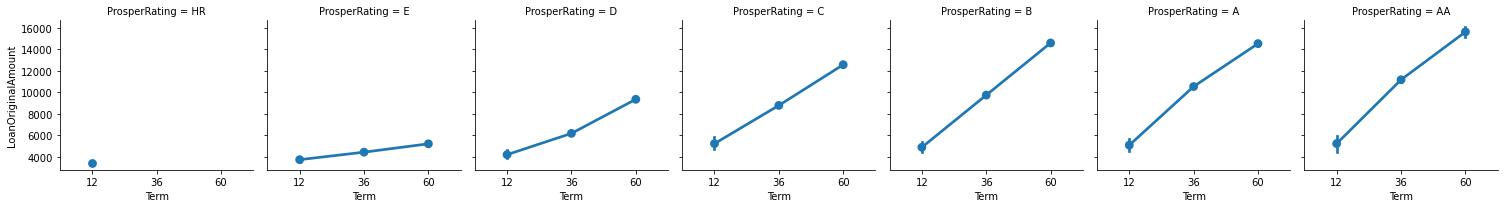

In [46]:
fig = sns.FacetGrid(data=loan_df, col='ProsperRating')
fig.map(sns.pointplot, 'Term', 'LoanOriginalAmount', order=None);

* High prosper rating borrowers appear to significantly raise their loan amounts once they have lengthier payback durations. The growing slope of the lines connecting the first and last facets demonstrates this. The Debt-to-Income Ratio is then examined using the same kind of faceted pointplots

**Debt to income ratio**

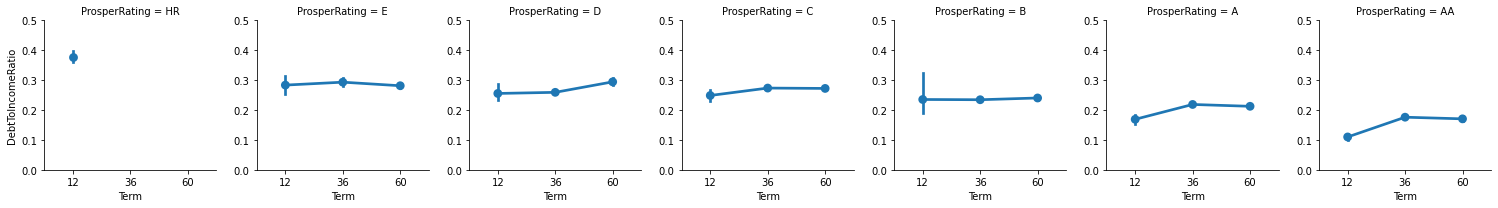

In [47]:
fig = sns.FacetGrid(data=loan_df, col='ProsperRating', sharey=False)
fig.map(sns.pointplot, 'Term', 'DebtToIncomeRatio', order=None)

for ax in fig.axes:
    for i in range(7):
        ax[i].set_ylim(0, 0.5)

* The slope of the connecting plot lines tells us an intriguing story despite the fact that debt-to-income ratio declines with posper ratings: The highest rated borrowers (A and AA) noticeably increase their debt-to-income ratios when longer payback periods are involved, particularly for 36-term (3-year) loans.

**Establishing a relationship/ connection between LoanOriginalAmount, DebtToIncomeRatio, BorrowerAPR and ProsperRating altogether.**

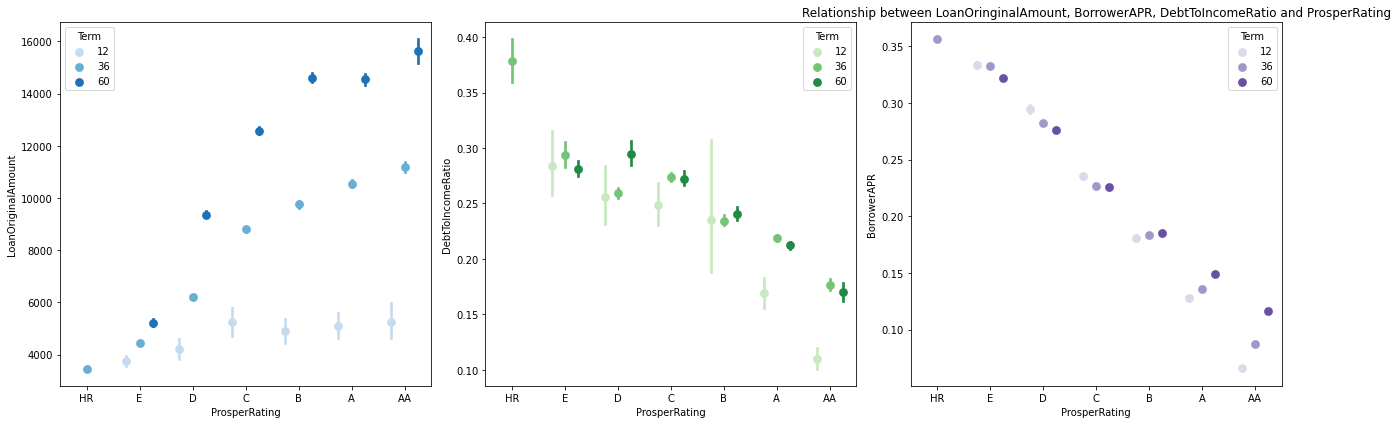

In [48]:
# Make a list of the columns you want to display on the y-axis.
y_columns = ['LoanOriginalAmount','DebtToIncomeRatio', 'BorrowerAPR']
# desirable list of color palettes
palettes = ['Blues', 'Greens', 'Purples']

plt.figure(figsize=(18, 6))

for col, index, colors in zip(y_columns, range(3), palettes):
    plt.subplot(1, 3, index+1)
    sns.pointplot(data=loan_df, x='ProsperRating', y=col, hue='Term', 
                  linestyles='', palette= colors, dodge=0.5)
plt.title('Relationship between LoanOringinalAmount, BorrowerAPR, DebtToIncomeRatio and ProsperRating')
plt.tight_layout();

**Observations**

* Due to their higher incomes, people with high prosper ratings frequently take out large loans on the platform, particularly when the payback period is lengthy. The vertical spacing between each point for each score rating on the first graphic demonstrates this. The highest rated people appear to be particularly affected by this behavior, with their debt-to-income ratio rising noticeably (AA and A). This can be seen on the second plot by comparing the vertical distance between loans with terms of 12 and 36 months for each prosper rating group.
* With rising prosper ratings, the relationship between borrower APR and loan amount changes from negative to positive. This is most likely a result of high-rated borrowers' propensity to abuse their advantage by taking out larger loans, especially over extended periods of time. The best way to prevent this as a lending platform may be to raise the APR on large, long-term loans to reflect the risk to investors and discourage borrowers from "overborrowing" sizable sums.
* Additionally logical is the declining APR for borrowers with low ratings. This might be a great way to persuade them to take out long-term loans if they have the financial means to repay them in full.

In conclusion,lets save our data for explanatory analysis purposes:

In [49]:
# Save cleaned data locally
loan_df.to_csv('prosper_loan_clean.csv')

## Conclusion

In order to understand the various reasons why borrowers request for loans, including the various variables that might affect loan favorability, Prosper loan data were examined.
* Our findings regarding borrower motivations were unexpected. The majority of persons appeared to have used loans to finance existing debt rather than taking out loans to launch enterprises or buy assets. The largest average loan amounts obtained through the platform are for debt consolidation. Aside from using large loans for business objectives, borrowers appear to rely on them to pay for engagement rings, marriages, and adoptions of children and boats.


## Limitations

* Our analysis contained a sizable amount of missing data. We were left with around 75% of the data in our original dataframe after deleting any missing records. Even while this is still a good figure, there are some questions about how well we can generalize the findings of our investigation.

* We have primarily examined the connection between various qualities for the majority of the scenarios in our research, therefore we cannot conclusively state that one trait causes the other to occur. This research is purely observational. A controlled experiment will be necessary to prove an actual causal connection.

## Recommendations

Since the feature corresponds with a good measure of both numerical and categorical characteristics, it could be useful to develop a predictive model that forecasts the value of BorrowerAPR depending on user input.